In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [7]:
# Load data
df = pd.read_csv(r"D:\AI\project\time_series_dataset24.csv")
df.head()

,PIN1,PTC,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,Patm,...,FricTorque,Pin,Pdiff,GV,AGV,ATB1,ATB2,Group,Stage,Head
0,0.002862,0.001300,0.004675,0.004430,0.006501,0.005931,0.006195,0.020413,0.024108,6.285425,...,1.246962,6.118898,6.649683,2.636216,0.297385,-0.163528,0.224599,DPL,1,24
1,0.002862,0.001297,0.004674,0.004431,0.006519,0.005950,0.006197,0.020705,0.022757,6.291337,...,1.250575,6.142219,6.677930,2.635310,0.205243,-0.051941,0.307536,DPL,1,24
2,0.002862,0.001292,0.004673,0.004432,0.006524,0.005949,0.006208,0.021536,0.021985,6.287724,...,1.245649,6.096892,6.639173,2.634754,0.124694,-0.024502,0.252041,DPL,1,24
3,0.002863,0.001287,0.004673,0.004432,0.006537,0.005971,0.006211,0.021012,0.020271,6.283783,...,1.266670,6.125139,6.676617,2.634428,0.108219,-0.042185,0.274605,DPL,1,24
4,0.002865,0.001284,0.004673,0.004431,0.006531,0.005995,0.006229,0.019912,0.018715,6.288381,...,1.247619,6.032514,6.704535,2.634260,0.229651,-0.048283,0.203255,DPL,1,24


In [8]:
df = df.drop(['PIN1','PTC','WTmp','Head','Patm','rpm','Speed','Flow','Thrust','GenTorque','FricTorque','Pin','Pdiff','GV','AGV','Group','PDT2','PGV1','PGV3','PDT4'], axis= 1)
print(df)

              PDT1      PGV2      PDT3      ATB1      ATB2  Stage
0         0.004675  0.005931  0.020413 -0.163528  0.224599      1
1         0.004674  0.005950  0.020705 -0.051941  0.307536      1
2         0.004673  0.005949  0.021536 -0.024502  0.252041      1
3         0.004673  0.005971  0.021012 -0.042185  0.274605      1
4         0.004673  0.005995  0.019912 -0.048283  0.203255      1
...            ...       ...       ...       ...       ...    ...
13823995  0.004092  0.006577  0.021125  0.208429  0.197766      9
13823996  0.004089  0.006554  0.022708  0.210258  0.222160      9
13823997  0.004089  0.006527  0.027942  0.145623  0.202035      9
13823998  0.004087  0.006505  0.026696  0.041963  0.208134      9
13823999  0.004087  0.006499  0.024260  0.105378  0.202035      9

[13824000 rows x 6 columns]


In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np

# --- Load Full Dataset ---
features = ['PDT1', 'PGV2', 'PDT3', 'ATB1', 'ATB2']
X = df[features].values
y = df['Stage'].values

# --- Normalization ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# --- Shift Labels to 0-based ---
y = y - 1

# --- Time Series Windowing ---
window_size = 30
stride = 5

X_windows = []
y_windows = []

for i in range(0, len(X_scaled) - window_size, stride):
    X_windows.append(X_scaled[i:i + window_size])
    y_windows.append(y[i + window_size - 1])

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

print("\n✅ After windowing → Found stages and counts:")
unique, counts = np.unique(y_windows, return_counts=True)
for stage, count in zip(unique + 1, counts):
    print(f"Stage {stage}: {count} samples")

# --- ✅ Subsample (Optional) Only if ALL 9 stages are present ---
if len(unique) < 9:
    print("\n⚠️ Not all stages present. Skipping subsampling to preserve rare classes.")
else:
    print("\n✅ All stages present. Subsampling dataset to reduce size.")
    X_windows, _, y_windows, _ = train_test_split(
        X_windows, y_windows,
        test_size=0.4,
        random_state=42,
        stratify=y_windows
    )

# --- Train/Test Split (Stratify to balance stages) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_windows, y_windows,
    test_size=0.2,
    random_state=42,
    stratify=y_windows
)

# --- Final Stage Counts in Train/Test ---
print("\n✅ Final train/test stage distribution:")
train_stages, train_counts = np.unique(y_train, return_counts=True)
test_stages, test_counts = np.unique(y_test, return_counts=True)

for stage, train_c, test_c in zip(train_stages + 1, train_counts, test_counts):
    print(f"Stage {stage}: Train = {train_c}, Test = {test_c}")

# --- Output Final Shapes ---
print("\n✅ Final dataset shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



✅ After windowing → Found stages and counts:
Stage 1: 307195 samples
Stage 2: 307200 samples
Stage 3: 307200 samples
Stage 4: 307200 samples
Stage 5: 307200 samples
Stage 6: 307200 samples
Stage 7: 307200 samples
Stage 8: 307200 samples
Stage 9: 307199 samples

✅ All stages present. Subsampling dataset to reduce size.

✅ Final train/test stage distribution:
Stage 1: Train = 147453, Test = 36864
Stage 2: Train = 147456, Test = 36864
Stage 3: Train = 147456, Test = 36864
Stage 4: Train = 147456, Test = 36864
Stage 5: Train = 147456, Test = 36864
Stage 6: Train = 147456, Test = 36864
Stage 7: Train = 147456, Test = 36864
Stage 8: Train = 147456, Test = 36864
Stage 9: Train = 147455, Test = 36864

✅ Final dataset shapes:
X_train shape: (1327100, 30, 5)
X_test shape: (331776, 30, 5)
y_train shape: (1327100,)
y_test shape: (331776,)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Smaller and simpler model
model = Sequential([

    # LSTM block
    layers.LSTM(64, return_sequences=True),  # reduced to 32 units
    layers.Dropout(0.2),  # increased dropout to prevent overfitting
    layers.LSTM(32, return_sequences=False),  # reduced to 32 units
    layers.Dropout(0.1),  # increased dropout to prevent overfitting
    # Fully connected classifier
    layers.Dense(64, activation='relu'),  # reduced to 32 units
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),  # reduced to 32 units
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')  # 9 classes
])

# Learning rate reduction + early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=40, # Increased epochs
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr] # Added callbacks
)

Epoch 1/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 885s 85ms/step - accuracy: 0.3808 - loss: 1.5408 - val_accuracy: 0.5774 - val_loss: 1.0515 - learning_rate: 0.0010
Epoch 2/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 685s 66ms/step - accuracy: 0.5880 - loss: 1.0509 - val_accuracy: 0.6727 - val_loss: 0.8343 - learning_rate: 0.0010
Epoch 3/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 507s 49ms/step - accuracy: 0.6632 - loss: 0.8849 - val_accuracy: 0.7048 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 4/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 507s 49ms/step - accuracy: 0.6905 - loss: 0.8236 - val_accuracy: 0.7242 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 5/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 513s 49ms/step - accuracy: 0.7065 - loss: 0.7861 - val_accuracy: 0.7310 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 6/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 518s 50ms/step - accuracy: 0.7177 - loss: 0.7609 - val_accuracy: 0.7389 - val_loss: 0.6806 - learning_rate: 0.0010
Epoch 7/40
10368/10368 ━━━━━━━━━━━━━━━━━━━━ 52

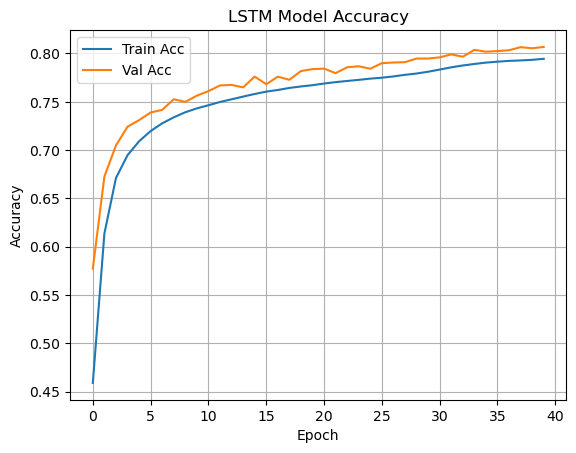

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import numpy as np

sample = np.array([[0.007111,  0.006554,  0.006877,  0.210258,  0.222160]])  # (1, 5)

sample_seq = np.repeat(sample, repeats=30, axis=0).reshape(1, 30, 5)  # (1, 30, 5)

# Predict
prediction = model.predict(sample_seq)

predicted_class_0_based = np.argmax(prediction, axis=1)[0]
predicted_class_1_based = predicted_class_0_based + 1

print("Predicted probabilities:", prediction)
print("Predicted fault stage (0-based):", predicted_class_0_based)
print("Predicted fault stage (1-based):", predicted_class_1_based)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
Predicted probabilities: [[1.4869902e-01 2.5351703e-11 2.8357422e-16 2.4611378e-05 2.0499377e-10
  2.3175844e-04 8.4268135e-01 5.1445821e-03 3.2186392e-03]]
Predicted fault stage (0-based): 6
Predicted fault stage (1-based): 7


10368/10368 ━━━━━━━━━━━━━━━━━━━━ 117s 11ms/step


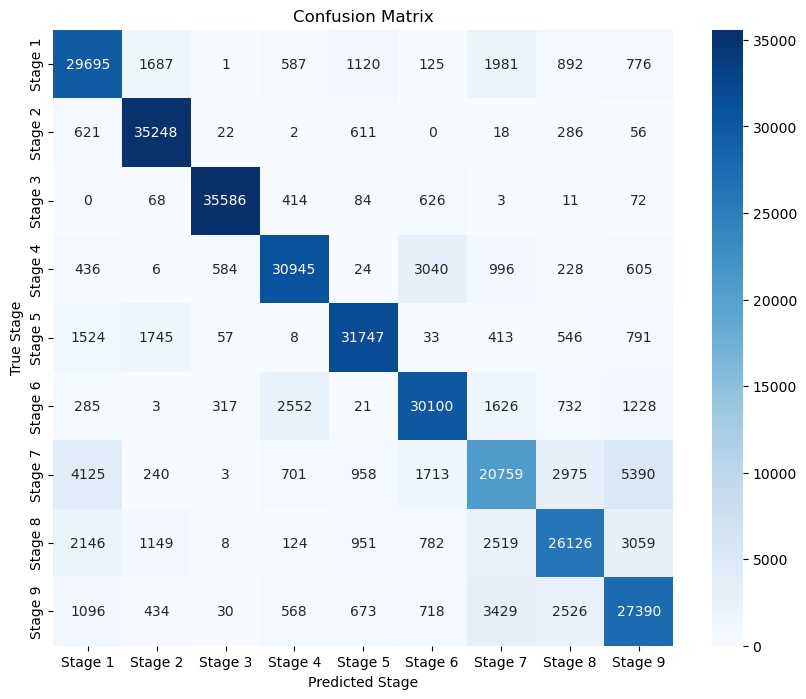

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Run predictions on your test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize it as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(1, 10)],
            yticklabels=[f'Stage {i}' for i in range(1, 10)])
plt.xlabel('Predicted Stage')
plt.ylabel('True Stage')
plt.title('Confusion Matrix')
plt.show()


In [16]:
print(df['Stage'].value_counts())


Stage
1    1536000
2    1536000
3    1536000
4    1536000
5    1536000
6    1536000
7    1536000
8    1536000
9    1536000
Name: count, dtype: int64


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=[f'Stage {i}' for i in range(1, 10)]))


              precision    recall  f1-score   support

     Stage 1       0.74      0.81      0.77     36864
     Stage 2       0.87      0.96      0.91     36864
     Stage 3       0.97      0.97      0.97     36864
     Stage 4       0.86      0.84      0.85     36864
     Stage 5       0.88      0.86      0.87     36864
     Stage 6       0.81      0.82      0.81     36864
     Stage 7       0.65      0.56      0.61     36864
     Stage 8       0.76      0.71      0.73     36864
     Stage 9       0.70      0.74      0.72     36864

    accuracy                           0.81    331776
   macro avg       0.81      0.81      0.80    331776
weighted avg       0.81      0.81      0.80    331776



In [18]:
# Save model in HDF5 format
model.save("lstm_fault_model.h5")
